In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [39]:
def draw_heatmap(dataframe: pd.DataFrame) -> None:
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        dataframe.corr(),
        xticklabels=dataframe.corr().columns,
        yticklabels=dataframe.corr().columns,
        annot=True,
    )

In [40]:
df = pd.read_csv("spaceship_titanic.csv")
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [41]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [42]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [43]:
cat_columns = ["HomePlanet", "Cabin", "Destination"]

In [44]:
for column_name in cat_columns:
    frequent_pl = df[column_name].value_counts().head(1).index[0]
    df[column_name].fillna(frequent_pl, inplace=True)

In [45]:
for name in [
    "Age",
    "CryoSleep",
    "VIP",
    "RoomService",
    "FoodCourt",
    "ShoppingMall",
    "Spa",
    "VRDeck",
]:
    df[name].fillna(df[name].median(), inplace=True)

In [46]:
df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [47]:
hashmap_cat = {}
for col in cat_columns:
    for i, val in enumerate(pd.unique(df[col])):
        hashmap_cat[val] = i

# print(hashmap_cat)

for col in cat_columns:
    for val in pd.unique(df[col]):
        df[col].replace(val, hashmap_cat[val], inplace=True)

## Нахождение родственников

In [48]:
id_name_df = df[["Cabin", "Name"]]
id_name_df

,Cabin,Name
0,0,Maham Ofracculy
1,1,Juanna Vines
2,2,Altark Susent
3,2,Solam Susent
4,3,Willy Santantines
...,...,...
8688,6556,Gravior Noxnuther
8689,6557,Kurta Mondalley
8690,6558,Fayey Connon
8691,6559,Celeon Hontichre


In [ ]:
id_name_df["Name"].fillna(
    "404 404", inplace=True
)  # Да, костыль. Да, нужно было бы проходиться по каждой строке. Но оно работает в рамках поставленной задачи!
id_name_df["Name"] = id_name_df["Name"].astype(str)
id_name_df

C:\Users\artem\AppData\Local\Temp\ipykernel_16424\3429876846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_name_df['Name'].fillna('404 404', inplace=True)  # Да, костыль. Да, нужно было бы проходиться по каждой строке. Но оно работает в рамках поставленной задачи!
C:\Users\artem\AppData\Local\Temp\ipykernel_16424\3429876846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_name_df['Name'] = id_name_df['Name'].astype(str)


,Cabin,Name
0,0,Maham Ofracculy
1,1,Juanna Vines
2,2,Altark Susent
3,2,Solam Susent
4,3,Willy Santantines
...,...,...
8688,6556,Gravior Noxnuther
8689,6557,Kurta Mondalley
8690,6558,Fayey Connon
8691,6559,Celeon Hontichre


In [50]:
from numpy import nan

In [ ]:
# id_name_df['PassengerId'] = id_name_df['PassengerId'].map(lambda x: x.split("_")[0])
id_name_df["Name"] = id_name_df["Name"].map(lambda x: x.split(" ")[1])
id_name_df["Name"].replace("404", nan, inplace=True)
id_name_df

C:\Users\artem\AppData\Local\Temp\ipykernel_16424\1846026550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_name_df['Name'] = id_name_df['Name'].map(lambda x: x.split(" ")[1])
C:\Users\artem\AppData\Local\Temp\ipykernel_16424\1846026550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_name_df['Name'].replace('404', nan, inplace=True)


,Cabin,Name
0,0,Ofracculy
1,1,Vines
2,2,Susent
3,2,Susent
4,3,Santantines
...,...,...
8688,6556,Noxnuther
8689,6557,Mondalley
8690,6558,Connon
8691,6559,Hontichre


In [ ]:
ppd = id_name_df.groupby(by=["Cabin", "Name"], dropna=False)["Name"].transform("count")
# ppd = ppd.replace(id_name_df.iloc[nan], 0, inplace=True)

# ['Name'].transform('size')
# ppd.replace(id_name_df.iloc[nan], 0, inplace=True)
not_family = True
if not_family:
    """
    Является ли человек частью своей семьи?
    """
    ppd = ppd.map(lambda x: max(0, x - 1))

# ppd.replace(1, 0, inplace=True)
ppd
ppd.sort_values(ascending=False)

338     6
688     6
686     6
339     6
340     6
       ..
8672    0
8673    0
8674    0
8675    0
20      0
Name: Name, Length: 8693, dtype: int64

In [ ]:
df["Count_family"] = ppd
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Count_family
0,0001_01,0,False,0,0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0
1,0002_01,1,False,1,0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0
2,0003_01,0,False,2,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1
3,0003_02,0,False,2,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1
4,0004_01,1,False,3,0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,False,6556,2,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0
8689,9278_01,1,True,6557,1,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0
8690,9279_01,1,False,6558,0,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0
8691,9280_01,0,False,6559,2,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1


## Отсекание лишнего

<Axes: >

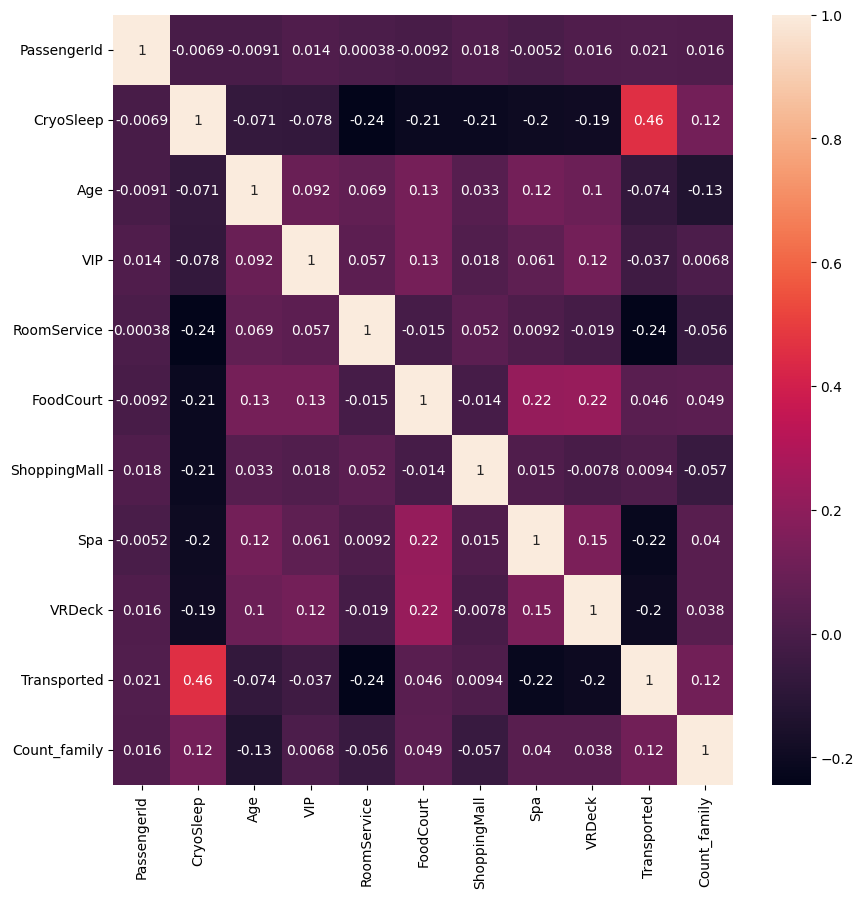

In [54]:
sdf = df.drop(columns=["Name"] + cat_columns, axis=1)
plt.figure(figsize=(10, 10))
sns.heatmap(
    sdf.corr(),
    xticklabels=sdf.corr().columns,
    yticklabels=sdf.corr().columns,
    annot=True,
)

## Дальнейшая обработка

In [55]:
sdf.drop(
    columns=["PassengerId", "ShoppingMall", "FoodCourt", "Age", "VIP"], inplace=True
)
sdf

,CryoSleep,RoomService,Spa,VRDeck,Transported,Count_family
0,False,0.0,0.0,0.0,False,0
1,False,109.0,549.0,44.0,True,0
2,False,43.0,6715.0,49.0,False,1
3,False,0.0,3329.0,193.0,False,1
4,False,303.0,565.0,2.0,True,0
...,...,...,...,...,...,...
8688,False,0.0,1643.0,74.0,False,0
8689,True,0.0,0.0,0.0,False,0
8690,False,0.0,1.0,0.0,True,0
8691,False,0.0,353.0,3235.0,False,1


<Axes: >

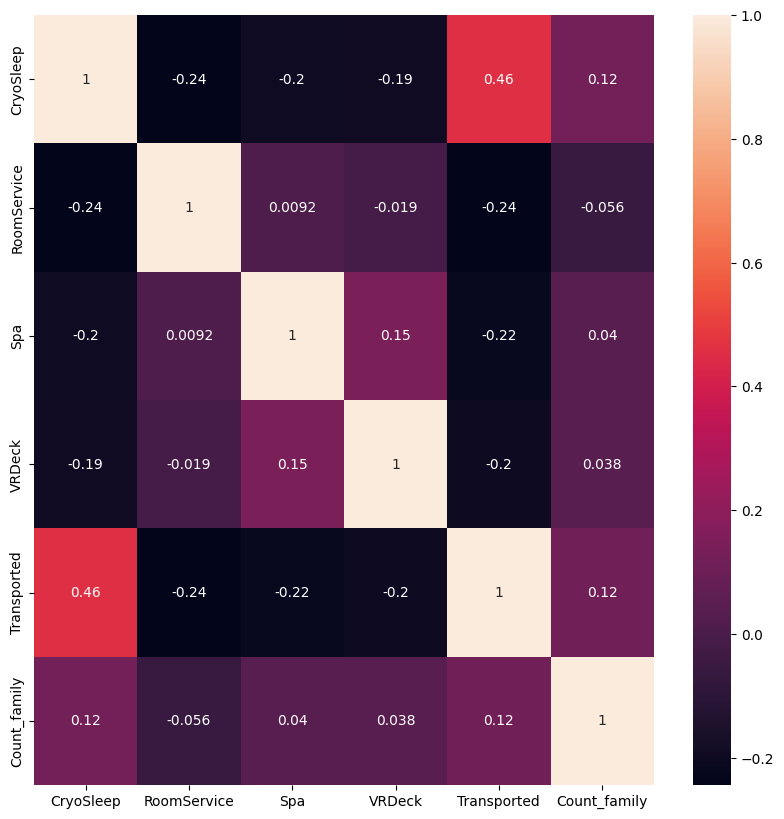

In [56]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    sdf.corr(),
    xticklabels=sdf.corr().columns,
    yticklabels=sdf.corr().columns,
    annot=True,
)

## Отделение целевой функции

In [57]:
split_sdf = sdf.drop(columns=["Transported"])
split_sdf

,CryoSleep,RoomService,Spa,VRDeck,Count_family
0,False,0.0,0.0,0.0,0
1,False,109.0,549.0,44.0,0
2,False,43.0,6715.0,49.0,1
3,False,0.0,3329.0,193.0,1
4,False,303.0,565.0,2.0,0
...,...,...,...,...,...
8688,False,0.0,1643.0,74.0,0
8689,True,0.0,0.0,0.0,0
8690,False,0.0,1.0,0.0,0
8691,False,0.0,353.0,3235.0,1


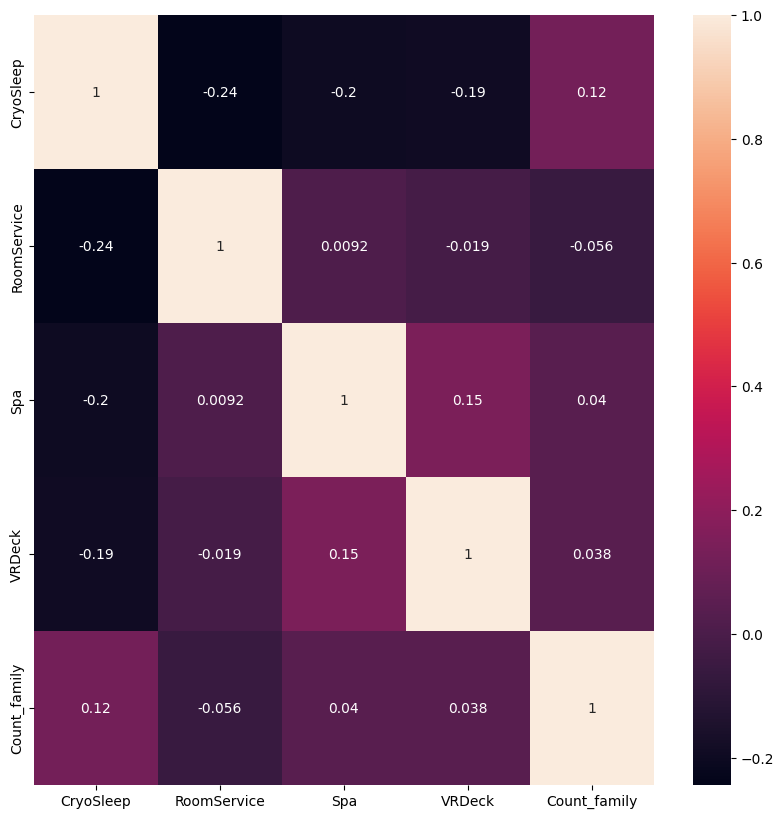

In [58]:
draw_heatmap(split_sdf)

## Убирание выбросов

Забавно, но от этого прога работает хуже)

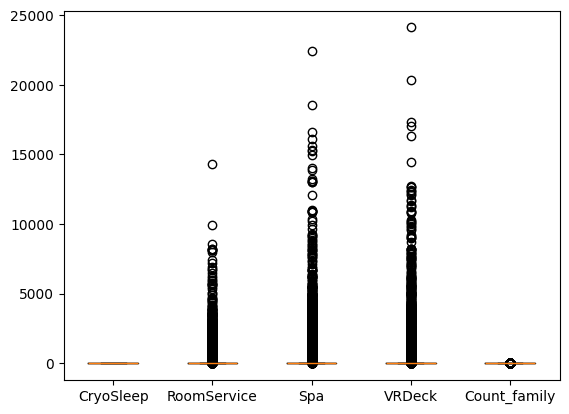

In [ ]:
from numpy import median, where

# plt.boxplot(df[features].values, whis=(0, 100))

features = sdf.drop(columns=["Transported"]).columns
plt.boxplot(sdf[features].values, whis=(25, 75))

# Добавление меток осей x
plt.xticks(range(1, len(features) + 1), features)

plt.show()

In [ ]:
def get_whiskers(dataframe: pd.DataFrame, feature: str):
    # Визуализация данных выбросами
    _x = dataframe.boxplot(column=feature, whis=(25, 75))
    plt.close("all")
    # Получение границ усов
    whiskers = []
    for line in _x.lines:
        if line.get_linestyle() == "-":
            whiskers.append(line.get_ydata())

    whiskers = whiskers[1:3]
    lower_whisker = whiskers[0][1]
    upper_whisker = whiskers[1][1]

    return lower_whisker, upper_whisker

In [ ]:
def delete_outlines(dataframe: pd.DataFrame, feature):
    lw, uw = get_whiskers(dataframe, feature)

    cur_median = median(
        dataframe[feature]
    )  # По-стандарту, выбросы заменяются на медианные значения (если, конечно, выбросов не слишком много.
    # Тогда уже всё плохо и нужно брать другую выборку)
    return where(
        (dataframe[feature] > uw) | (dataframe[feature] < lw),
        cur_median,
        dataframe[feature],
    )  # Условие, при истине, при лжи

In [62]:
sdf[features[0]] = sdf[features[0]].astype(float)
sdf

,CryoSleep,RoomService,Spa,VRDeck,Transported,Count_family
0,0.0,0.0,0.0,0.0,False,0
1,0.0,109.0,549.0,44.0,True,0
2,0.0,43.0,6715.0,49.0,False,1
3,0.0,0.0,3329.0,193.0,False,1
4,0.0,303.0,565.0,2.0,True,0
...,...,...,...,...,...,...
8688,0.0,0.0,1643.0,74.0,False,0
8689,1.0,0.0,0.0,0.0,False,0
8690,0.0,0.0,1.0,0.0,True,0
8691,0.0,0.0,353.0,3235.0,False,1


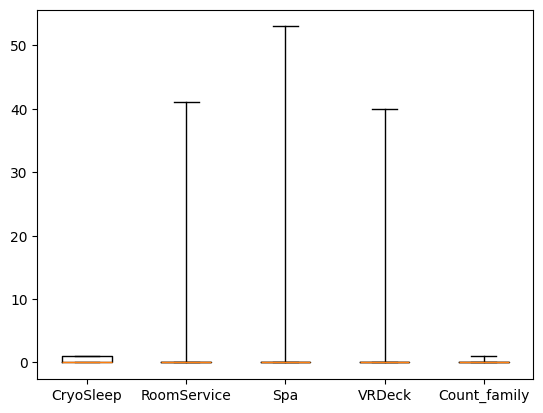

In [ ]:
for f in features:
    sdf[f] = delete_outlines(sdf, f)
# Вывод boxplot для выбранных столбцов
plt.boxplot(sdf[features].values, whis=(0, 100))
# plt.boxplot(df[features].values)

# Добавление меток осей x
plt.xticks(range(1, len(features) + 1), features)

# Отображение графика
plt.show()

## Нормализация

In [64]:
for f in sdf.columns:
    misdf = min(sdf[f])
    masdf = max(sdf[f])
    sdf[f] = sdf[f].map(lambda x: (x - misdf) / (masdf - misdf))

sdf

,CryoSleep,RoomService,Spa,VRDeck,Transported,Count_family
0,0.0,0.0,0.000000,0.00,0.0,0.0
1,0.0,0.0,0.000000,0.00,1.0,0.0
2,0.0,0.0,0.000000,0.00,0.0,1.0
3,0.0,0.0,0.000000,0.00,0.0,1.0
4,0.0,0.0,0.000000,0.05,1.0,0.0
...,...,...,...,...,...,...
8688,0.0,0.0,0.000000,0.00,0.0,0.0
8689,1.0,0.0,0.000000,0.00,0.0,0.0
8690,0.0,0.0,0.018868,0.00,1.0,0.0
8691,0.0,0.0,0.000000,0.00,0.0,1.0


# Обучение моделей

In [65]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)
import xgboost as xgb

1. **accuracy_score** - это метрика, которая показывает долю правильно классифицированных образцов в обучающем наборе данных. Она вычисляется как отношение количества правильно классифицированных образцов к общему количеству образцов.

2. **precision_score** - это метрика, которая показывает, насколько точны положительные прогнозы модели. Она вычисляется как отношение истинно положительных прогнозов к сумме истинно положительных и ложно положительных прогнозов.

3. **recall_score** - это метрика, которая показывает, насколько хорошо модель обнаруживает положительные образцы. Она вычисляется как отношение истинно положительных прогнозов к сумме истинно положительных и ложно отрицательных прогнозов.

4. **f1_score** - это метрика, которая является гармоническим средним между точностью и полнотой. Она используется, когда важно учесть обе метрики одновременно.

5. **confusion_matrix** - это матрица, которая показывает количество истинно положительных, ложно положительных, истинно отрицательных и ложно отрицательных прогнозов модели. Она используется для более детального анализа ошибок модели.

In [ ]:
def get_score(y_true, y_pred):
    return (
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred),
        recall_score(y_true, y_pred),
        f1_score(y_true, y_pred),
        confusion_matrix(y_true, y_pred),
    )

In [68]:
df_train, df_test = tts(sdf, train_size=0.7, random_state=42)
df_train

,CryoSleep,RoomService,Spa,VRDeck,Transported,Count_family
3032,0.0,0.000000,0.000000,0.00,1.0,0.0
7757,1.0,0.000000,0.000000,0.00,1.0,0.0
1795,0.0,0.195122,0.094340,0.00,0.0,0.0
1702,0.0,0.000000,0.037736,0.75,0.0,0.0
6634,0.0,0.000000,0.000000,0.00,0.0,0.0
...,...,...,...,...,...,...
5734,0.0,0.341463,0.000000,0.00,1.0,0.0
5191,0.0,0.000000,0.000000,0.00,0.0,0.0
5390,0.0,0.000000,0.000000,0.65,0.0,0.0
860,0.0,0.000000,0.000000,0.00,0.0,0.0


## Тренировка моделей

1. **RandomForest** - это ансамблевый алгоритм машинного обучения, который использует множество деревьев решений для классификации или регрессии. Он работает путем создания большого количества деревьев решений и объединения их результатов для получения окончательного прогноза. Этот алгоритм хорошо работает с большими объемами данных и может обрабатывать большое количество признаков.

2. **XGBoost** - это библиотека машинного обучения, которая использует градиентный бустинг для построения ансамблей деревьев решений. XGBoost является одной из самых популярных библиотек для построения градиентного бустинга.
    1. *Градиентный бустинг* - работает путем последовательного обучения моделей, где каждая следующая модель обучается на ошибках предыдущих моделей.

---

0. **Ансамблевая модель** - это модель, которая объединяет несколько базовых моделей для получения более точного и надежного прогноза. Ансамблевые модели могут быть двух типов: бэггинг и бустинг.
    1. *Бэггинг* — использует метод случайного подвыборки для создания нескольких моделей, а затем объединяет их результаты.
    2. *Бустинг* — использует метод последовательного обучения, когда каждая следующая модель обучается на ошибках предыдущих моделей.

### RandomForest

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(df_train.drop(columns=["Transported"]), df_train["Transported"])

RandomForestClassifier()

In [ ]:
rfc_result = rfc.predict(df_test.drop(columns=["Transported"]))
rfc_result

array([1., 0., 1., ..., 0., 0., 0.])

In [ ]:
rfc.score(df_test.drop(columns=["Transported"]), df_test["Transported"]), get_score(
    df_test["Transported"], rfc_result
)

(0.7101226993865031,
 (0.7101226993865031,
  np.float64(0.7604070305272895),
  np.float64(0.623199393479909),
  np.float64(0.685),
  array([[1030,  259],
         [ 497,  822]])))

### XGBoost

In [ ]:
xgbc = xgb.XGBClassifier()
xgbc.fit(df_train.drop(columns=["Transported"]), df_train["Transported"])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgbc_result = xgbc.predict(df_test.drop(columns=["Transported"]))
xgbc_result

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
xgbc.score(df_test.drop(columns=["Transported"]), df_test["Transported"]), get_score(
    df_test["Transported"], xgbc_result
)

(0.7158742331288344,
 (0.7158742331288344,
  np.float64(0.7747148288973384),
  np.float64(0.6178923426838514),
  np.float64(0.6874736398144243),
  array([[1052,  237],
         [ 504,  815]])))

# Лаба 5